In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import decode_predictions
from keras.applications.resnet50 import preprocess_input

In [2]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
from os import listdir
from PIL import Image as PImage

In [3]:
img_width, img_height = 224, 224

In [4]:
model_pretrained = ResNet50(weights='imagenet',
                      include_top=True,
                      input_shape=(img_height, img_width, 3))

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:08<00:00, 176MB/s]
100% 1.06G/1.06G [00:08<00:00, 135MB/s]


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [16]:
# Insert correct path of your image below
img_path = '/content/test/dogs/dog.1013.jpg'
img = image.load_img(img_path, target_size=(img_width, img_height))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

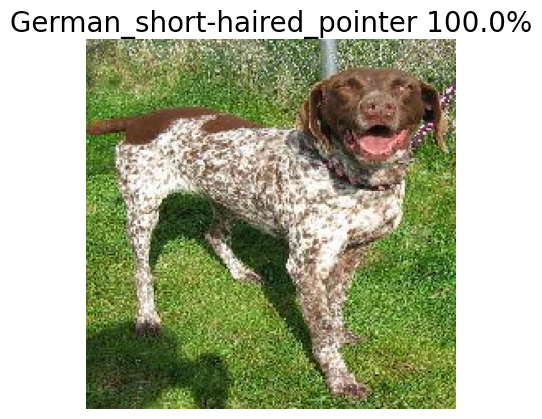

In [17]:
#predict the result
cnn_feature = model_pretrained.predict(img_data,verbose=0)
# decode the results into a list of tuples (class, description, probability)
label = decode_predictions(cnn_feature)
label = label[0][0]


plt.imshow(img)

stringprint ="%.1f" % round(label[2]*100,1)
plt.title(label[1] + " " + str(stringprint) + "%", fontsize=20)
plt.axis('off')
plt.show()

In [18]:
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(cnn_feature, top=3)[0])

Predicted: [('n02100236', 'German_short-haired_pointer', 0.9999167), ('n02101388', 'Brittany_spaniel', 4.590333e-05), ('n02088632', 'bluetick', 2.1586553e-05)]


In [19]:
label

('n02100236', 'German_short-haired_pointer', 0.9999167)

ValueError: num must be an integer with 1 <= num <= 12, not 13

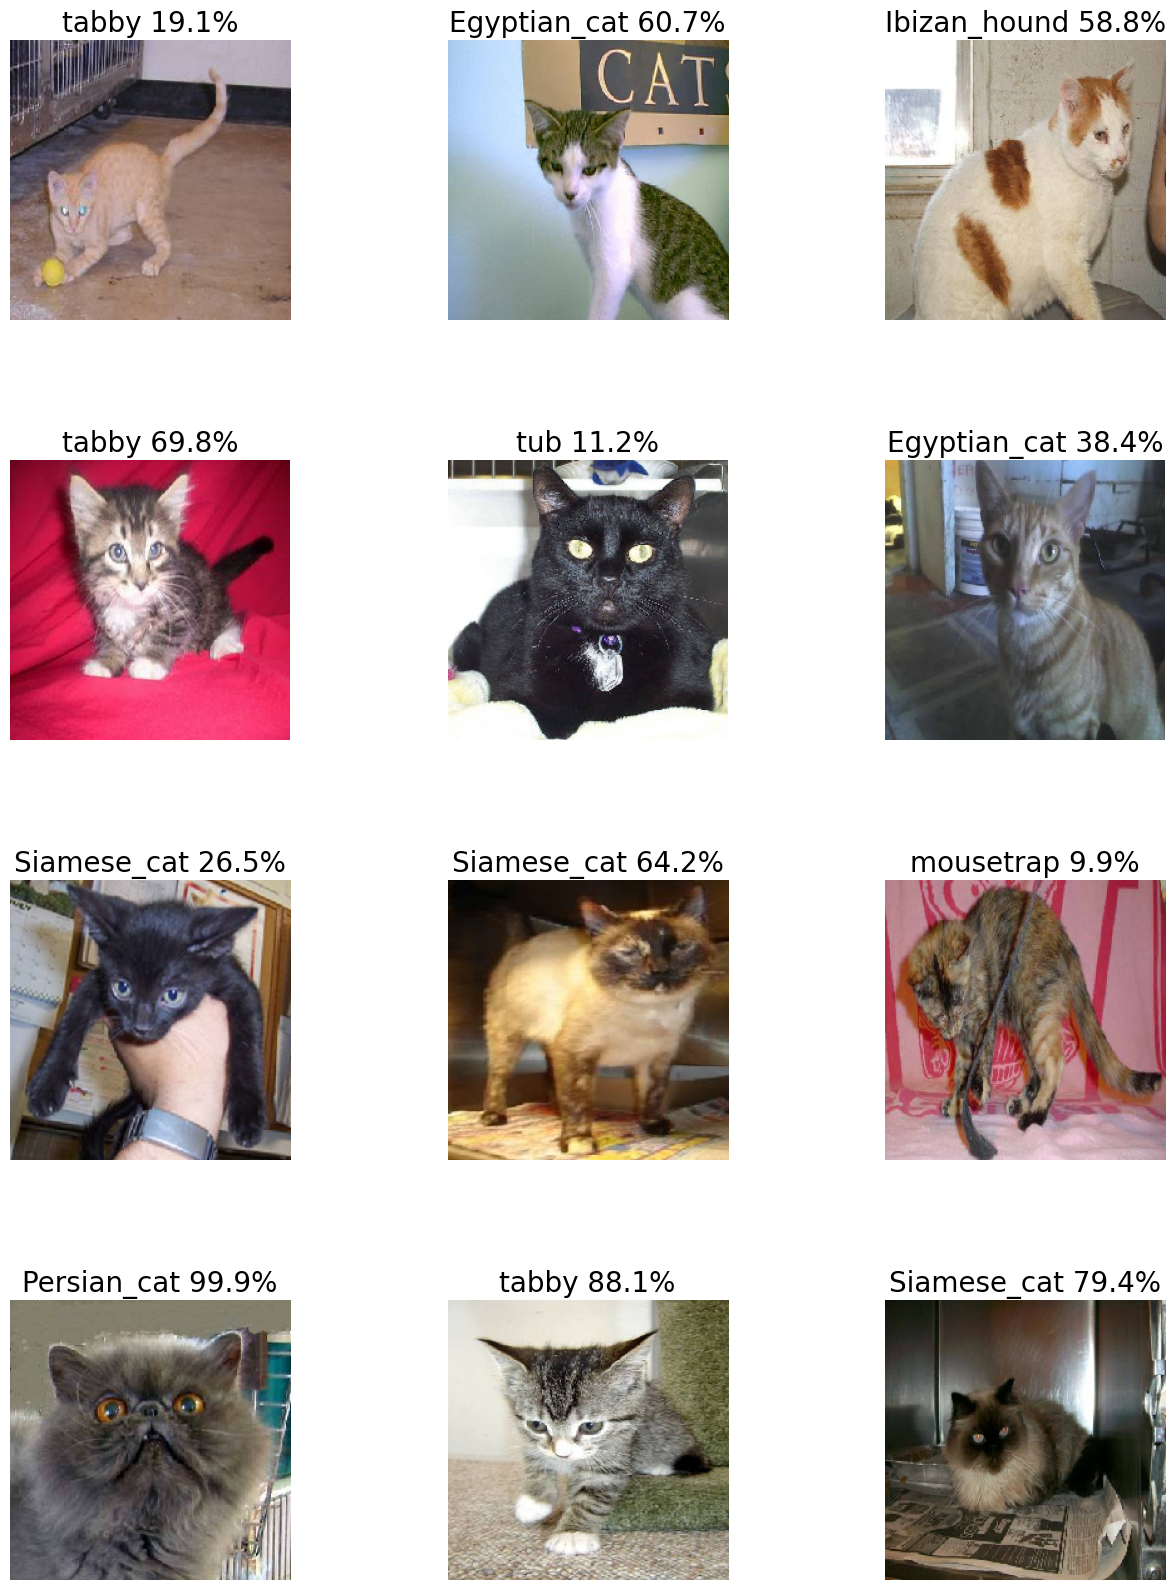

In [23]:
# Insert correct path of your image folder below

folder_path = '/content/test/cats/'
images = os.listdir(folder_path)
fig = plt.figure(figsize=(16,20))
i=0
rows=4
columns=3

for image1 in images:
    i+=1
    img = image.load_img(folder_path+image1, target_size=(img_width, img_height))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)

    cnn_feature = model_pretrained.predict(img_data,verbose=0)
    label = decode_predictions(cnn_feature)
    label = label[0][0]

    fig.add_subplot(rows,columns,i)
    fig.subplots_adjust(hspace=.5)

    plt.imshow(img)
    stringprint ="%.1f" % round(label[2]*100,1)
    plt.title(label[1] + " " + str(stringprint) + "%", fontsize=20)
    plt.axis('off')
plt.show()